In [ ]:
# Larger CNN for the MNIST Dataset
import numpy
import cv2
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv3D, Conv2D
from tensorflow.keras.layers import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
import tensorflow as tf
K.image_data_format()

'channels_last'

In [ ]:
# Fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape to be samples*pixels*width*height
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

# Normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# One Hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Create model
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(1, 28, 28), activation='relu', strides = 1, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same', data_format='channels_last'))
model.add(Conv2D(16, (3, 3), activation='relu', strides = 1, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same', data_format='channels_last'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/100
1875/1875 [==============================] - 13s 3ms/step - loss: 0.6236 - accuracy: 0.7979 - val_loss: 0.0980 - val_accuracy: 0.9685
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1522 - accuracy: 0.9526 - val_loss: 0.0738 - val_accuracy: 0.9752
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1069 - accuracy: 0.9664 - val_loss: 0.0563 - val_accuracy: 0.9812
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0918 - accuracy: 0.9717 - val_loss: 0.0524 - val_accuracy: 0.9823
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0806 - accuracy: 0.9746 - val_loss: 0.0437 - val_accuracy: 0.9838
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0704 - accuracy: 0.9769 - val_loss: 0.0540 - val_accuracy: 0.9832
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0636 - accuracy: 0.9803 - val_loss: 0.0461 - val_a

In [ ]:
#  - - - - - - - TEST single image - - - - - - - -

image = (X_test[1]).reshape(1,1,28,28) # 1->'2';
model_pred = model.predict_classes(image, verbose = 0)
print('Prediction of model: {}'.format(model_pred[0]))

Prediction of model: 2


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Test images shape: (4, 28, 28)
Predicted digit: 2
Predicted digit: 1
Predicted digit: 0
Predicted digit: 4


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


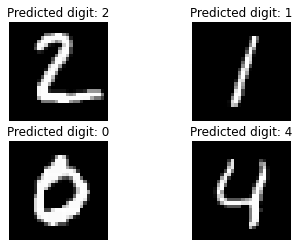

In [ ]:
# - - - - - - TESTING multiple image - - - - - - - - - -

test_images = X_test[1:5]
test_images = test_images.reshape(test_images.shape[0], 28, 28)
print ("Test images shape: {}".format(test_images.shape))

for i, test_image in enumerate(test_images, start=1):
    org_image = test_image
    test_image = test_image.reshape(1,1,28,28)
    prediction = model.predict_classes(test_image, verbose=0)

    print ("Predicted digit: {}".format(prediction[0]))
    plt.subplot(220+i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(prediction[0]))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))

plt.show()

In [ ]:
# - - - - - - - SAVE THE MODEL - - - - - - - -
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
